In [16]:
import pandas as pd 
from collections import defaultdict 
from utils import load_json 
datasetdir = 'PubMedCLIP/QCR_PubMedCLIP/data/data_rad'
imagedir = f'{datasetdir}/images'
trainset = load_json(f'{datasetdir}/trainset.json')
testset = load_json(f'{datasetdir}/testset.json')
extra_dir = 'PubMedCLIP/extra'

## Find all CT images 


In [14]:
full_dataset = trainset + testset
mod_dict = defaultdict(list) 
image2qid = defaultdict(list)
qid2data = {}


for d in full_dataset:
    qid = d['qid']
    qid2data[qid] = d
    image_name = d['image_name']
    modality = d['modality']
    mod_dict[modality].append(image_name)
    image2qid[image_name].append(d['qid'])
# count
for k,v in mod_dict.items():
    print(f'{k}: {len(v)}')


MRI: 822
X-Ray: 1262
CT: 1431


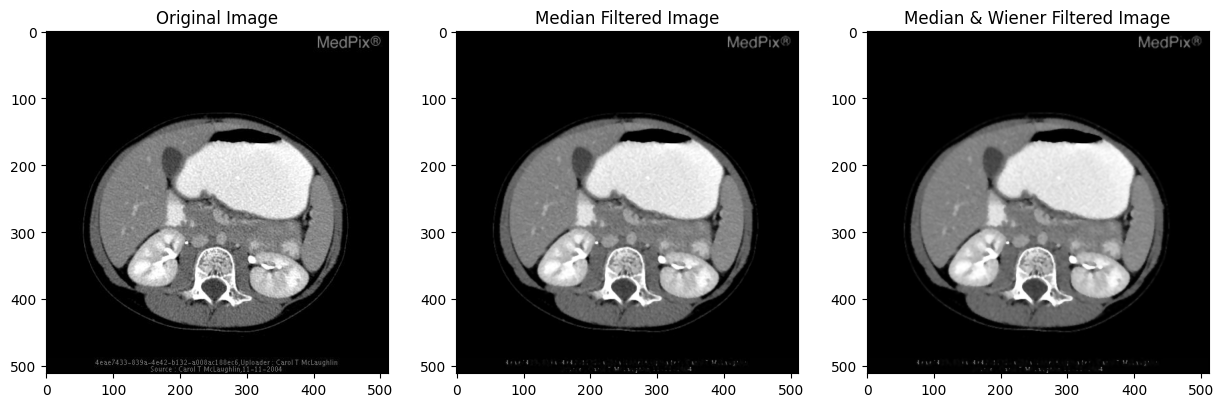

In [11]:
# identify all Ct images 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage.filters import median
from skimage.filters.rank import median as rank_median 
from skimage import io

# Load the image
r = np.random.randint(0, len(mod_dict['CT']))
imgpath = f'{imagedir}/{mod_dict["CT"][r]}'
img = io.imread(imgpath, as_gray=True)

# Apply median filtering
median_img = median(img)

# Apply Wiener filtering
filtered_img = wiener(median_img)

# Display the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(median_img, cmap='gray')
ax[1].set_title('Median Filtered Image')
ax[2].imshow(filtered_img, cmap='gray')
ax[2].set_title('Median & Wiener Filtered Image')
plt.show()


In [13]:
imgpath


'PubMedCLIP/QCR_PubMedCLIP/data/data_rad/images/synpic22020.jpg'

In [18]:
# make a txt of image: samples 
import os
outfile = f'{extra_dir}/all_ct_2_questions.txt'
visited = set()
with open(outfile, 'w') as f:
    for image_name in mod_dict['CT']:
        if image_name in visited:
            continue
        f.write(f'{image_name}\n')
        visited.add(image_name)
        for qid in image2qid[image_name]:
            d = qid2data[qid]
            question = d['question']
            answer = d['answer']
            f.write(f'\t{qid}.{question}\t{answer}\n')
        